## Customer Segmentation in Marketing with Python Project
Exploring K-Means Clustering for Effective Marketing Strategies

### Project Details

#### Case Description

To what extent does the platform’s acquisition channel influence the learning outcomes of students?

Are there any geographical locations where most of the students discover the platform, specifically through social media platforms like YouTube or Facebook?

In [3]:
#Importing the Libraries


#for data manipulation
import pandas as pd

#for numerical computing 
import numpy as np

#for scientific and technical computing
import scipy

#for visualization
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

#for standardizing the features
from sklearn.preprocessing import StandardScaler

#for clustering 
from sklearn.cluster import KMeans

#for dimensionality reduction and transforming data into new features and retaining the most important information
from sklearn.decomposition import PCA

#for saving the model
import pickle

In [7]:
#importing and loading the data

df = pd.read_csv("C:/Users/HP/Downloads/customer_segmentation_data.csv")

In [342]:
#Exploring the dataset
df.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


Region is a categorical variable where the student comes from.	
		0	USA, Canada, United Kingdom, Australia	
		1	Western Europe	
		2	Rest of the World	


Channel	is a categorical Variable	{1, 2, 3, 4, 5, 6, 7, 8}	This is the channel through which the customer has learned about the program		
		1	Google		
		2	Facebook		
		3	YouTube		
		4	LinkedIn		
		5	Twitter		
		6	Instagram		
		7	Friend		
		8	Other		


In [344]:
df.describe()

,minutes_watched,CLV,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


In [346]:
df.shape

(3834, 4)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [350]:
print(df.isna().sum())

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64


In [352]:
# showing records with missing value
print('Records with missing minutes watched')
df_missing = df[df['minutes_watched'].isna() == True]
df_missing.head()

Records with missing minutes watched


,minutes_watched,CLV,region,channel
215,NaN,300.06,0,4
368,NaN,43.82,1,3
470,NaN,150.28,0,6
545,NaN,149.99,2,3
764,NaN,62.58,2,6


Handle NA values in the dataset
Most likely, these null values correspond to people who've entered the program, but have not seen any content. 
Instead of removing them from the dataset, fill missing values with zeroes instead. 

In [354]:
# impute missing values with zeros
print('Impute missing values with Zeros')
df_missing = df_missing.fillna(0)
df_missing.head()

Impute missing values with Zeros


,minutes_watched,CLV,region,channel
215,0.0,300.06,0,4
368,0.0,43.82,1,3
470,0.0,150.28,0,6
545,0.0,149.99,2,3
764,0.0,62.58,2,6


In [356]:
# impute missing values with zeros
print('Impute missing values with Zeros')
df_imputed = df.fillna(0)
df_imputed.head()

Impute missing values with Zeros


,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [358]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3834 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [360]:
df_imputed.isna().sum()

minutes_watched    0
CLV                0
region             0
channel            0
dtype: int64

In [362]:
df_imputed.corr()

,minutes_watched,CLV,region,channel
minutes_watched,1.000000,0.114153,0.040100,-0.003718
CLV,0.114153,1.000000,-0.273312,-0.026359
region,0.040100,-0.273312,1.000000,0.015098
channel,-0.003718,-0.026359,0.015098,1.000000


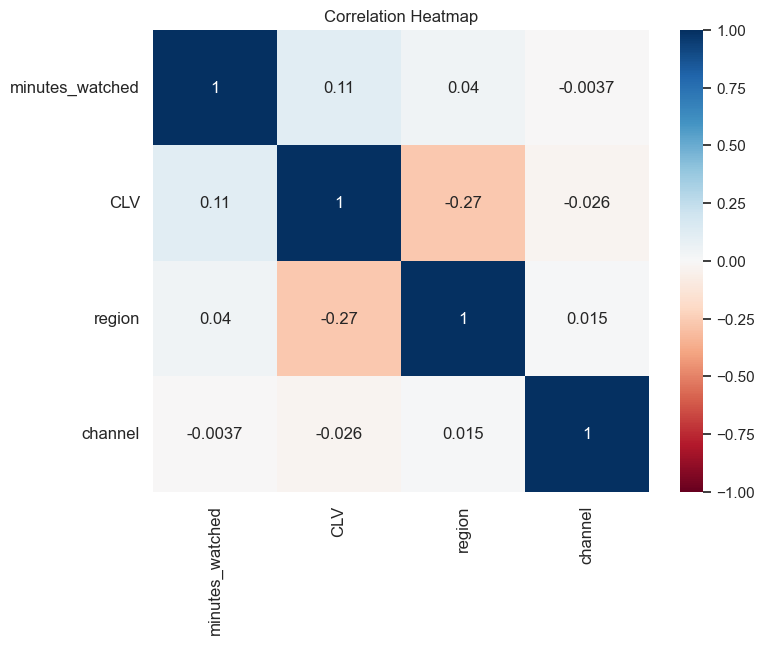

In [364]:
plt.figure(figsize = (8, 6))
s = sns.heatmap(df_imputed.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.savefig('corr.png')
plt.show()

In [370]:
channel_mapping = {1: "Google", 2: 'Facebook',  3: 'YouTube', 4: 'LinkedIn', 5:'Twitter', 6:' Instagram', 7: 'Friend',  8: 'Other'}
region_mapping = {0: "CAUU", 1: 'WE',  2: 'ROW'}
df_imputed['channel'] = df_imputed['channel'].replace(channel_mapping)
df_imputed['region'] = df_imputed['region'].replace(region_mapping)
print(df_imputed)

      minutes_watched     CLV region   channel
0              3197.0  205.42    ROW  LinkedIn
1                63.0  149.99   CAUU    Google
2               605.0  119.00    ROW  Facebook
3                20.0  240.00    ROW  LinkedIn
4               245.0  184.36     WE  LinkedIn
...               ...     ...    ...       ...
3829             11.0   79.00   CAUU   YouTube
3830             28.0   79.00   CAUU  Facebook
3831             57.0   36.00    ROW  Facebook
3832             44.0   36.00    ROW    Google
3833              0.0   79.00   CAUU   YouTube

[3834 rows x 4 columns]


In [378]:
df_encoded = pd.get_dummies(df_imputed, columns= ['channel', 'region'])
print(df_encoded)

      minutes_watched     CLV  channel_ Instagram  channel_Facebook  \
0              3197.0  205.42               False             False   
1                63.0  149.99               False             False   
2               605.0  119.00               False              True   
3                20.0  240.00               False             False   
4               245.0  184.36               False             False   
...               ...     ...                 ...               ...   
3829             11.0   79.00               False             False   
3830             28.0   79.00               False              True   
3831             57.0   36.00               False              True   
3832             44.0   36.00               False             False   
3833              0.0   79.00               False             False   

      channel_Friend  channel_Google  channel_LinkedIn  channel_Other  \
0              False           False              True          False   
1

In [380]:
df_encoded.head()

,minutes_watched,CLV,channel_ Instagram,channel_Facebook,channel_Friend,channel_Google,channel_LinkedIn,channel_Other,channel_Twitter,channel_YouTube,region_CAUU,region_ROW,region_WE
0,3197.0,205.42,False,False,False,False,True,False,False,False,False,True,False
1,63.0,149.99,False,False,False,True,False,False,False,False,True,False,False
2,605.0,119.00,False,True,False,False,False,False,False,False,False,True,False
3,20.0,240.00,False,False,False,False,True,False,False,False,False,True,False
4,245.0,184.36,False,False,False,False,True,False,False,False,False,False,True


In [382]:
df_encoded = df_encoded.astype(int)
print(df_encoded)

      minutes_watched  CLV  channel_ Instagram  channel_Facebook  \
0                3197  205                   0                 0   
1                  63  149                   0                 0   
2                 605  119                   0                 1   
3                  20  240                   0                 0   
4                 245  184                   0                 0   
...               ...  ...                 ...               ...   
3829               11   79                   0                 0   
3830               28   79                   0                 1   
3831               57   36                   0                 1   
3832               44   36                   0                 0   
3833                0   79                   0                 0   

      channel_Friend  channel_Google  channel_LinkedIn  channel_Other  \
0                  0               0                 1              0   
1                  0               1 

In [384]:
df_encoded.head()

,minutes_watched,CLV,channel_ Instagram,channel_Facebook,channel_Friend,channel_Google,channel_LinkedIn,channel_Other,channel_Twitter,channel_YouTube,region_CAUU,region_ROW,region_WE
0,3197,205,0,0,0,0,1,0,0,0,0,1,0
1,63,149,0,0,0,1,0,0,0,0,1,0,0
2,605,119,0,1,0,0,0,0,0,0,0,1,0
3,20,240,0,0,0,0,1,0,0,0,0,1,0
4,245,184,0,0,0,0,1,0,0,0,0,0,1


In [386]:
df_encoded.corr()

,minutes_watched,CLV,channel_ Instagram,channel_Facebook,channel_Friend,channel_Google,channel_LinkedIn,channel_Other,channel_Twitter,channel_YouTube,region_CAUU,region_ROW,region_WE
minutes_watched,1.000000,0.113996,-0.024114,0.034347,0.004660,-0.006665,-0.020212,0.015535,-0.015796,0.007681,-0.037041,0.038583,-0.004707
CLV,0.113996,1.000000,-0.012932,-0.042295,-0.025403,0.017926,-0.070496,0.019641,-0.044505,0.095584,0.193283,-0.320821,0.208061
channel_ Instagram,-0.024114,-0.012932,1.000000,-0.084089,-0.107757,-0.131508,-0.129006,-0.081371,-0.035387,-0.180416,-0.026750,-0.014409,0.061514
channel_Facebook,0.034347,-0.042295,-0.084089,1.000000,-0.111147,-0.135646,-0.133066,-0.083931,-0.036500,-0.186093,-0.042251,0.051676,-0.017144
channel_Friend,0.004660,-0.025403,-0.107757,-0.111147,1.000000,-0.173826,-0.170519,-0.107555,-0.046774,-0.238471,-0.077989,0.080273,-0.008435
channel_Google,-0.006665,0.017926,-0.131508,-0.135646,-0.173826,1.000000,-0.208105,-0.131262,-0.057083,-0.291035,0.032869,-0.031955,0.000673
channel_LinkedIn,-0.020212,-0.070496,-0.129006,-0.133066,-0.170519,-0.208105,1.000000,-0.128765,-0.055997,-0.285498,-0.061812,0.070621,-0.017431
channel_Other,0.015535,0.019641,-0.081371,-0.083931,-0.107555,-0.131262,-0.128765,1.000000,-0.035320,-0.180078,0.093788,-0.100570,0.016341
channel_Twitter,-0.015796,-0.044505,-0.035387,-0.036500,-0.046774,-0.057083,-0.055997,-0.035320,1.000000,-0.078313,-0.047585,0.062629,-0.026109
channel_YouTube,0.007681,0.095584,-0.180416,-0.186093,-0.238471,-0.291035,-0.285498,-0.180078,-0.078313,1.000000,0.079869,-0.071330,-0.008067


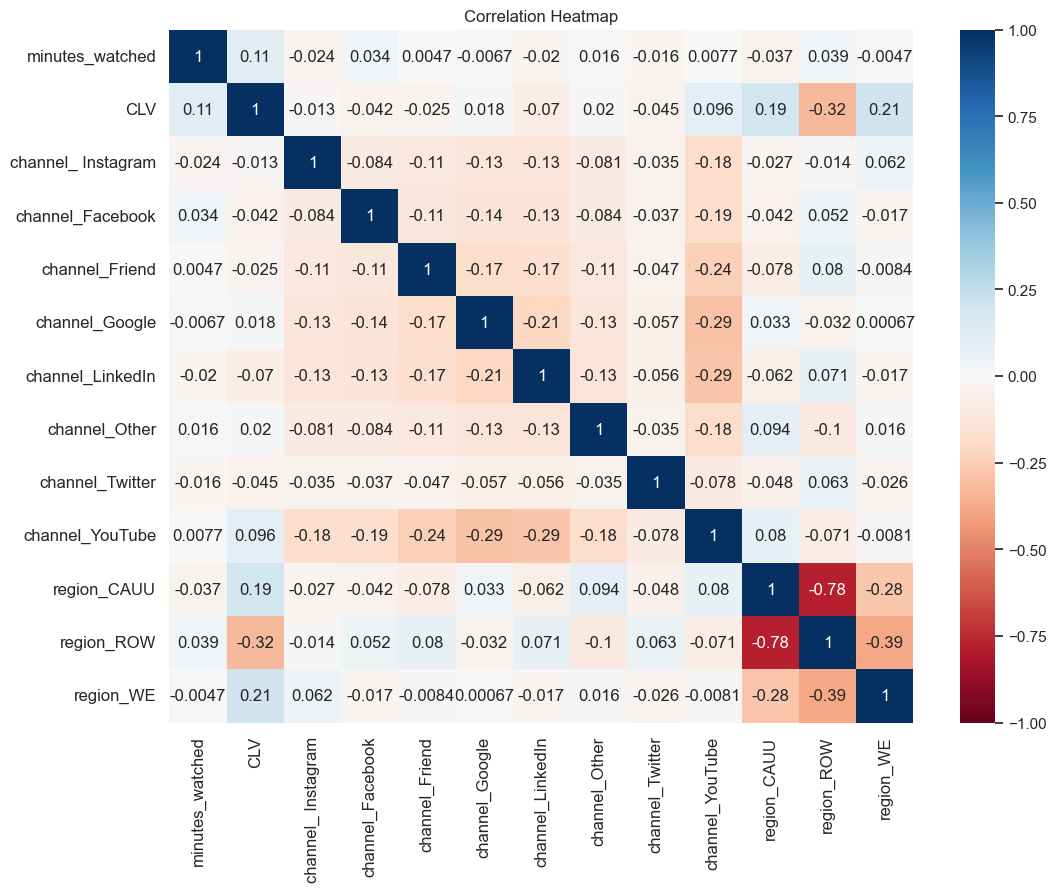

In [390]:
#Visualizing the correlation using color coding
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_encoded.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

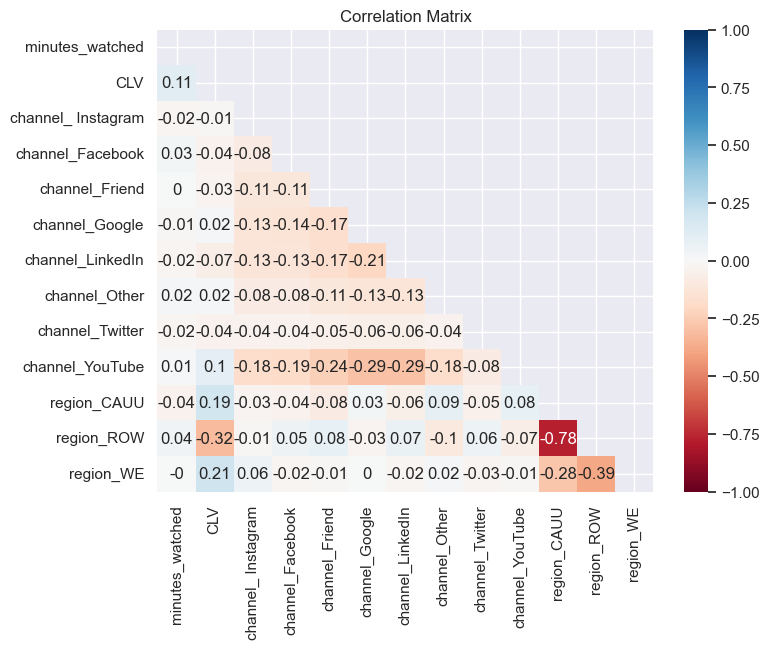

In [392]:
# Compute the correlation matrix
corr_matrix = df_encoded.corr().round(2)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='RdBu',
            vmin=-1,
            vmax=1,
            mask=mask)
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

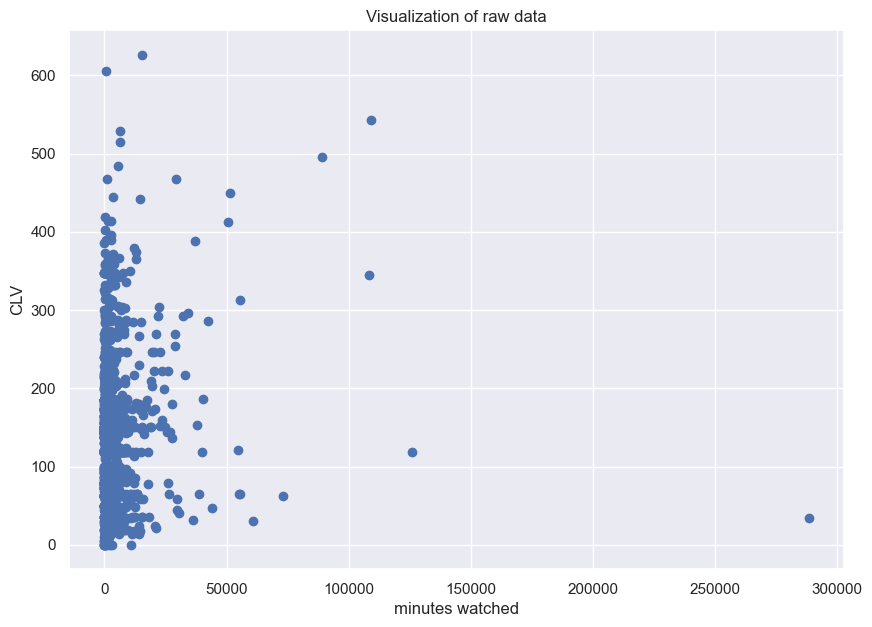

In [394]:
plt.figure(figsize = (10, 7))
plt.scatter(df_encoded['minutes_watched'],df_imputed['CLV'])
plt.xlabel('minutes watched')
plt.ylabel('CLV')
plt.title('Visualization of raw data')

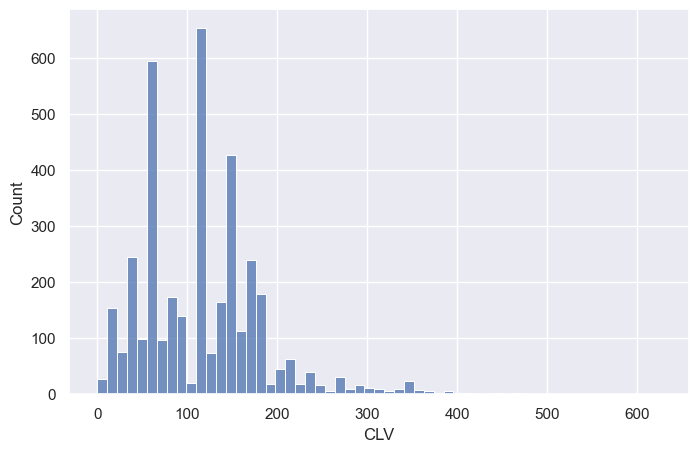

In [396]:
plt.figure(figsize = (8, 5))
sns.histplot(data=df_imputed, x='CLV')
plt.show()

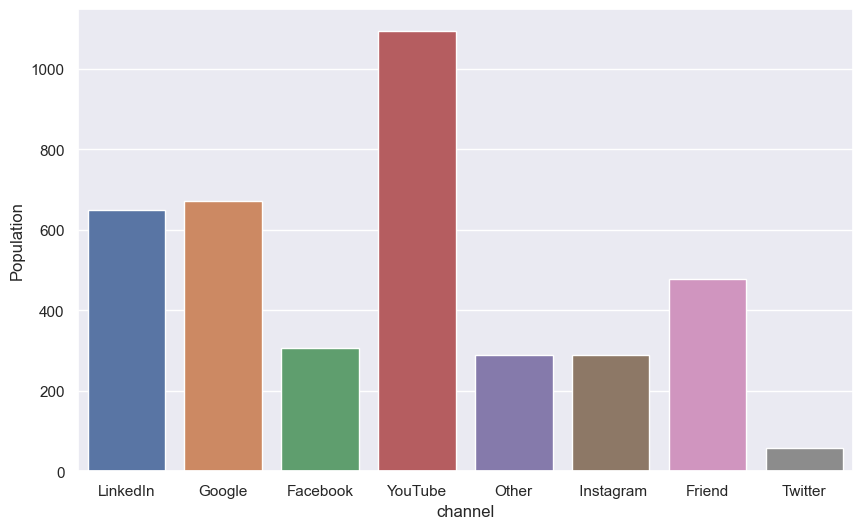

In [398]:
plt.figure(figsize=(10, 6))
s = sns.countplot(
    data=df_imputed,
    x='channel',
    hue='channel',
    legend=False
)
plt.xlabel('channel')
plt.ylabel('Population')
plt.show()

In [400]:
# Standardizing the data to ensure all features have equal weight. This is important for modelling.
scaler = StandardScaler()
df_std = scaler.fit_transform(df_encoded)

In [402]:
#Performing KMeans clusttering 

# We will consider 1 to 10 clusters, our For loop will run 10 iterations.
# we will also run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
#WCSS Stands for Within Cluster Sum of Squares
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

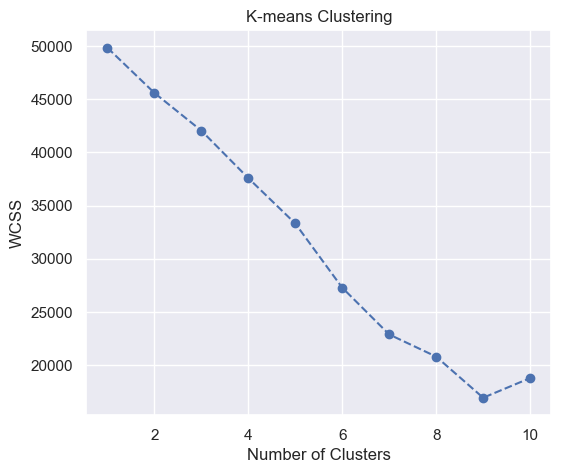

In [404]:
# Plot the wcss for the different number of clusters.
# From this plot we can then choose the number of clusters. 

plt.figure(figsize = (6,5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [406]:
# We run K-means with 8 clusters and divide the customer into 8 clusters
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
kmeans.fit(df_std)

KMeans(random_state=42)

In [408]:
#Lets look at the results

# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_kmeans = df_encoded.copy()
df_kmeans['K-means Segments'] = kmeans.labels_

In [410]:
# Calculating the mean values for the clusters
df_analysis = df_kmeans.groupby(['K-means Segments']).mean()
df_analysis

,minutes_watched,CLV,channel_ Instagram,channel_Facebook,channel_Friend,channel_Google,channel_LinkedIn,channel_Other,channel_Twitter,channel_YouTube,region_CAUU,region_ROW,region_WE
K-means Segments,,,,,,,,,,,,,
0,2767.643791,107.901961,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.287582,0.611111,0.101307
1,1854.812656,119.512906,0.194838,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.805162,0.454621,0.545379,0.000000
2,2018.969340,108.747642,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.290094,0.709906,0.000000
3,1594.067241,101.651724,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.325862,0.674138,0.000000
4,2314.083333,122.871528,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.513889,0.347222,0.138889
5,1830.432203,114.828814,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.444068,0.555932,0.000000
6,985.327586,92.724138,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.172414,0.775862,0.051724
7,1776.126615,161.095607,0.142119,0.0,0.139535,0.209302,0.180879,0.0,0.0,0.328165,0.000000,0.000000,1.000000


In [414]:
# Computing the size and proportions of the four clusters
df_analysis['No Obs'] = df_kmeans[['K-means Segments','region_WE']].groupby(['K-means Segments']).count()
df_analysis['Prop Obs'] = df_analysis['No Obs'] / df_analysis['No Obs'].sum()
df_analysis

,minutes_watched,CLV,channel_ Instagram,channel_Facebook,channel_Friend,channel_Google,channel_LinkedIn,channel_Other,channel_Twitter,channel_YouTube,region_CAUU,region_ROW,region_WE,No Obs,Prop Obs
K-means Segments,,,,,,,,,,,,,,,
0,2767.643791,107.901961,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.287582,0.611111,0.101307,306,0.079812
1,1854.812656,119.512906,0.194838,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.805162,0.454621,0.545379,0.000000,1201,0.313250
2,2018.969340,108.747642,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.290094,0.709906,0.000000,424,0.110589
3,1594.067241,101.651724,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.325862,0.674138,0.000000,580,0.151278
4,2314.083333,122.871528,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.513889,0.347222,0.138889,288,0.075117
5,1830.432203,114.828814,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.444068,0.555932,0.000000,590,0.153886
6,985.327586,92.724138,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.172414,0.775862,0.051724,58,0.015128
7,1776.126615,161.095607,0.142119,0.0,0.139535,0.209302,0.180879,0.0,0.0,0.328165,0.000000,0.000000,1.000000,387,0.100939


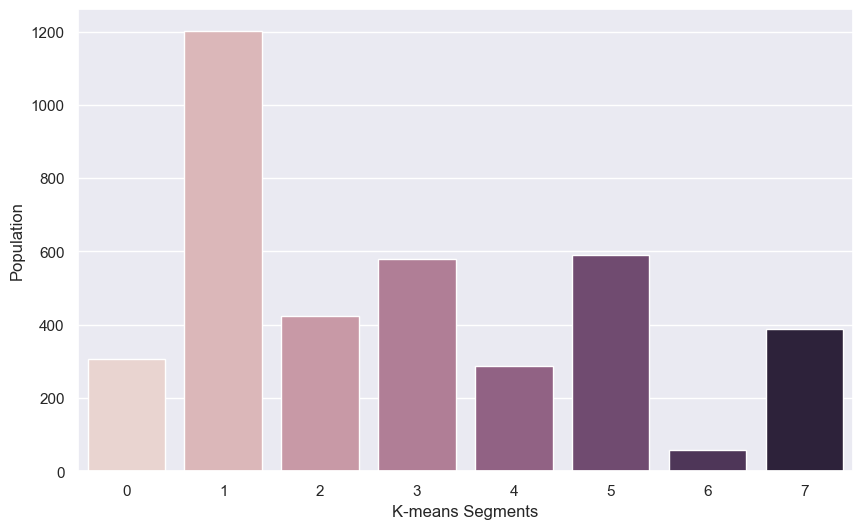

In [416]:
plt.figure(figsize=(10, 6))
s = sns.countplot(
    data=df_kmeans,
    x='K-means Segments',
    hue='K-means Segments',
    legend=False
)
plt.xlabel('K-means Segments')
plt.ylabel('Population')
plt.show()

In [418]:
segment_names = {
    0: 'Highest ENG FB Followers',
    1: 'AVG ENG Instagram/YT',
    2: 'High ENG from Friends influenced',
    3: 'Low ENG LI followers',
    4: 'High ENG from Other Channels',
    5: 'AVG ENG from Google',
    6: 'Low ENG from Twitter',
    7: 'AVG ENG from WE' 
}
df_kmeans['K-means Segments'] = df_kmeans['K-means Segments'].map(segment_names)
df_kmeans.head()

,minutes_watched,CLV,channel_ Instagram,channel_Facebook,channel_Friend,channel_Google,channel_LinkedIn,channel_Other,channel_Twitter,channel_YouTube,region_CAUU,region_ROW,region_WE,K-means Segments
0,3197,205,0,0,0,0,1,0,0,0,0,1,0,Low ENG LI followers
1,63,149,0,0,0,1,0,0,0,0,1,0,0,AVG ENG from Google
2,605,119,0,1,0,0,0,0,0,0,0,1,0,Highest ENG FB Followers
3,20,240,0,0,0,0,1,0,0,0,0,1,0,Low ENG LI followers
4,245,184,0,0,0,0,1,0,0,0,0,0,1,AVG ENG from WE


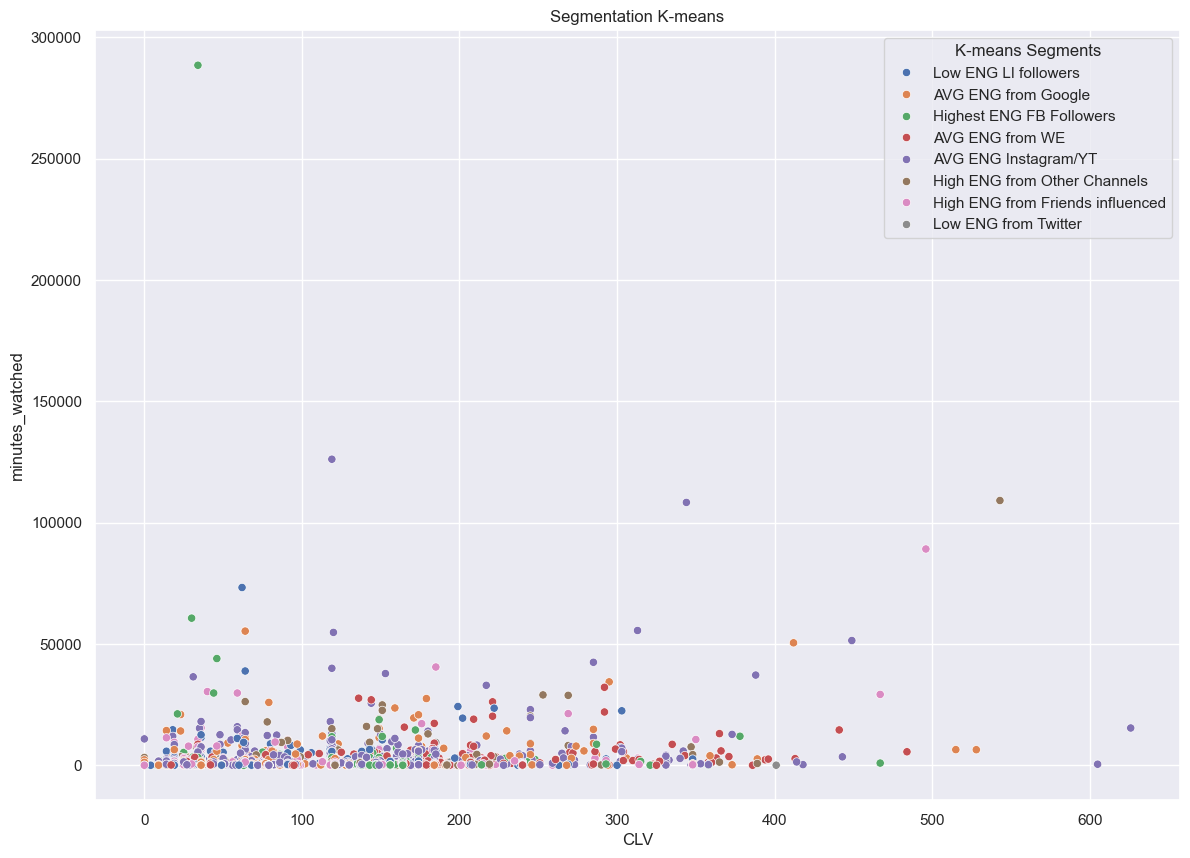

In [430]:
# Defining the x-axis data as 'total_payments' from the dataframe.
x_axis = df_kmeans['CLV']

# Defining the y-axis data as 'minutes_watched' from the dataframe
y_axis = df_kmeans['minutes_watched']

# Setting the figure size for the scatter plot.
plt.figure(figsize = (14, 10))

# Creating a scatter plot using seaborn.
# The 'hue' parameter colors the points based on the 'Labels' column, allowing for distinction between clusters.
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans['K-means Segments'])

# Setting the title of the scatter plot.
plt.title('Segmentation K-means')

# Displaying the scatter plot.
plt.show()